In [138]:
import pandas as pd
import numpy as np 
import missingno
import seaborn as sns
sns.set(rc={'figure.figsize' : (9, 6)})

In [8]:
!pip install missingno

In [263]:
default_data = pd.read_csv('C:/Users/Xiaomi/Downloads/covid19_1/covid-19cases.csv', index_col='Unnamed: 0')
default_data.head(3)

,date,continent,location,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,...,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,Unnamed: 40,Unnamed: 41,iso_code,month,year
0,13-03-20,North America,Aruba,2.0,2.0,NaN,NaN,0.0,NaN,18.733,...,NaN,NaN,NaN,76.29,NaN,NaN,NaN,ABW,3.0,20.0
1,For Notes:,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,19-03-20,North America,Aruba,NaN,NaN,0.286,NaN,NaN,0.0,NaN,...,NaN,NaN,NaN,76.29,NaN,NaN,NaN,ABW,3.0,20.0


<AxesSubplot:>

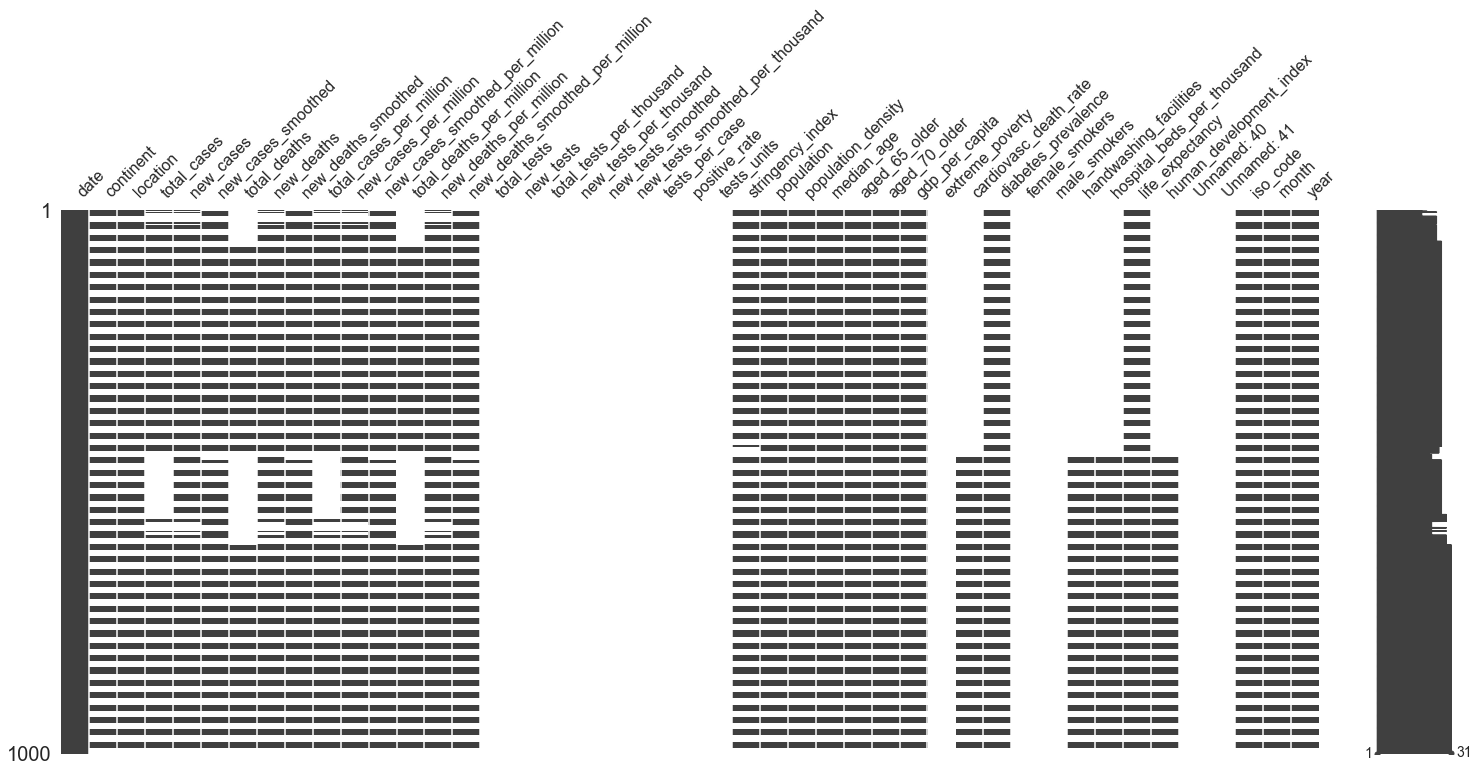

In [268]:
# Посмотрим на распределение NAN в данных
missingno.matrix(default_data.head(1000))

In [172]:
# Remove rows for notes
data = default_data.drop([i for i in range(1, data.shape[0], 2)], axis = 0)

In [173]:
# remove 2 empty columns
data = data.drop(['Unnamed: 40', 'Unnamed: 41'], axis = 1)

In [174]:
# remove rows with none continent
data = data[~data.continent.isna()]

In [175]:
# Оставим только самую нужную дату
new_data = data.loc[:, ['date', 'continent', 'location', 'total_cases', 'new_cases', 'month', 'year']]
new_data.head()

,date,continent,location,total_cases,new_cases,month,year
0,13-03-20,North America,Aruba,2.0,2.0,3.0,20.0
2,19-03-20,North America,Aruba,NaN,NaN,3.0,20.0
4,20-03-20,North America,Aruba,4.0,2.0,3.0,20.0
6,21-03-20,North America,Aruba,NaN,NaN,3.0,20.0
8,22-03-20,North America,Aruba,NaN,NaN,3.0,20.0


In [215]:
# Так как нам нужны статистики за заражений за каждый месяц, то нет смысла держать информацию заражений по дням
res = new_data.groupby(['continent','year', 'month'], as_index=False).agg({'new_cases' : 'sum', 'total_cases' : 'max'})

In [220]:
# В total_cases встречаются наны, но они в первые месяца и там new_cases = 0 -> fillna(0)
res.fillna(0, inplace=True)

In [238]:
# Учтем в новой колонке date год и месяц вместе
res['date'] = res.month.astype(int).astype(str) + '-20' + res.year.astype(int).astype(str)

In [245]:
# избавимся от лишней информации
res = res.drop(['year', 'month'], axis=1)

In [247]:
res.head()

,continent,new_cases,total_cases,date
0,Africa,0.0,0.0,12-2019
1,Africa,0.0,0.0,1-2020
2,Africa,2.0,1.0,2-2020
3,Africa,4203.0,1326.0,3-2020
4,Africa,24489.0,5350.0,4-2020


<AxesSubplot:xlabel='date', ylabel='new_cases'>

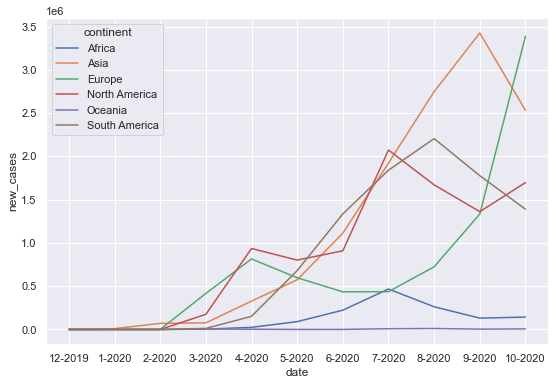

In [242]:
# статистики новых заболеваний на разных континентах
sns.lineplot(x='date', y='new_cases',data=tmp, hue='continent')

<AxesSubplot:xlabel='date', ylabel='new_cases'>

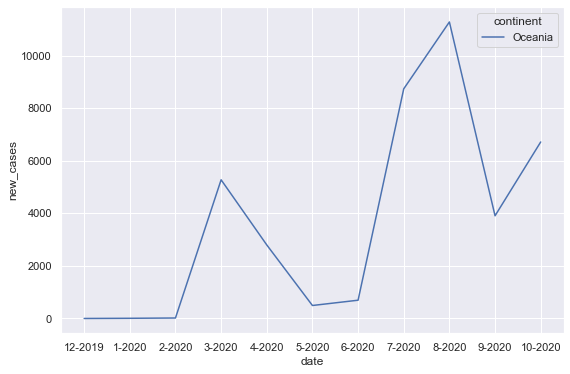

In [264]:
# Проверим, что статистики океании тоже растут
sns.lineplot(x='date', y='new_cases',data=tmp.loc[tmp.continent == 'Oceania'], hue='continent')

In [318]:
tmp.continent.unique()

array(['Africa', 'Asia', 'Europe', 'North America', 'Oceania',
       'South America'], dtype=object)

# Корелляция

In [314]:
mi = float('inf')
res = []
continent_list = data.continent.unique()
for i in range(len(continent_list)):
    res.append([])
    s1 = tmp.loc[tmp.continent == continent_list[i]].reset_index().new_cases
    for j in range(len(continent_list)):
        s2 = tmp.loc[tmp.continent == continent_list[j]].reset_index().new_cases
        res[i].append(s1.corr(s2))

In [319]:
continent_list

array(['North America', 'Asia', 'Africa', 'Europe', 'South America',
       'Oceania'], dtype=object)

In [320]:
res = np.array(res)
print(res)

[[1.         0.84078453 0.84492955 0.58073359 0.9006383  0.77807787]
 [0.84078453 1.         0.62355593 0.62053534 0.92057704 0.67996159]
 [0.84492955 0.62355593 1.         0.16084781 0.84158887 0.67231225]
 [0.58073359 0.62053534 0.16084781 1.         0.43269996 0.40583082]
 [0.9006383  0.92057704 0.84158887 0.43269996 1.         0.72485383]
 [0.77807787 0.67996159 0.67231225 0.40583082 0.72485383 1.        ]]


In [308]:
print(tmp.loc[tmp.continent == continent_list[0]].new_cases)

33          0.0
34          9.0
35         73.0
36     175189.0
37     935923.0
38     801890.0
39     909058.0
40    2074156.0
41    1671828.0
42    1361692.0
43    1697752.0
Name: new_cases, dtype: float64


In [309]:
print(tmp.loc[tmp.continent == continent_list[1]].new_cases)

11         27.0
12       9749.0
13      70484.0
14      76476.0
15     328195.0
16     574397.0
17    1112993.0
18    1923461.0
19    2749241.0
20    3427140.0
21    2532704.0
Name: new_cases, dtype: float64
